In [1]:
import numpy as np
from matplotlib import pyplot as plt


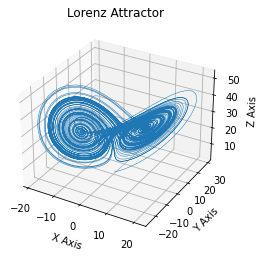

In [32]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

x10 = np.empty(num_steps + 1)
x20 = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    if i > 10:
        x10[i + 1] = xs[i-10]
    else: 
        x10[i+1] = x10[i]
    if i > 20:
        x20[i + 1] = xs[i-10]
    else:
        x20[i+1] = x20[i]
    
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

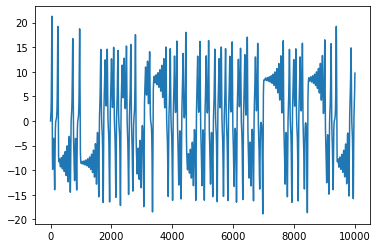

In [33]:
plt.plot(np.arange(0, 10001),xs)


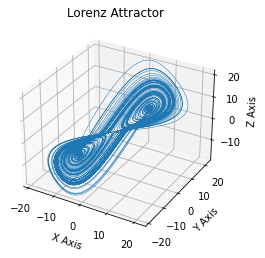

In [34]:
# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(xs, x10, x20, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [5]:
coords = np.vstack((xs,ys,zs))
print(coords.shape)
U, s, V = np.linalg.svd(coords)
U.shape, s.shape, V.shape


(3, 10001)


((3, 3), (3,), (10001, 10001))

In [6]:
print(np.vstack((U[:,0], U[:,1], U[:,2])).shape)
basis = np.vstack((U[:,0], U[:,1], U[:,2]))
print(U)
print(basis)
coordssvd = np.linalg.solve(U, coords)
coordssvd

(3, 3)
[[-5.60278136e-03  6.61730227e-01  7.49721092e-01]
 [-5.33115525e-03  7.49702439e-01 -6.61753604e-01]
 [-9.99970093e-01 -7.70454029e-03 -6.72632273e-04]]
[[-5.60278136e-03 -5.33115525e-03 -9.99970093e-01]
 [ 6.61730227e-01  7.49702439e-01 -7.70454029e-03]
 [ 7.49721092e-01 -6.61753604e-01 -6.72632273e-04]]


array([[ -1.05529975,  -1.02780406,  -1.00212789, ..., -19.96779395,
        -20.61918247, -21.36879631],
       [  0.74161267,   0.80050442,   0.87240421, ...,  15.69326229,
         16.42969373,  17.15243483],
       [ -0.66245987,  -0.58085139,  -0.52540997, ...,  -2.29687106,
         -2.33589393,  -2.3476029 ]])

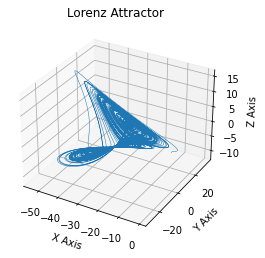

In [10]:
# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(coordssvd[0], coordssvd[1], coordssvd[2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [5]:
delays = np.vstack((xs,x10,x20))
print(delays.shape)
U1, s1, V1 = np.linalg.svd(delays)
U1.shape, s1.shape, V1.shape

(3, 10001)


((3, 3), (3,), (10001, 10001))

In [6]:
basis = np.vstack((U1[:,0], U1[:,1], U1[:,2]))
delayssvd = np.linalg.solve(U1, delays)
delayssvd

array([[-1.28190582e-311, -5.71155036e-002, -1.07948302e-001, ...,
        -1.24122528e+001, -1.30830475e+001, -1.37840976e+001],
       [-8.91970421e-312,  8.20842204e-002,  1.55139177e-001, ...,
         2.05307162e+000,  2.14880801e+000,  2.23807338e+000],
       [-1.03541822e-316,  1.00663046e-006,  1.90253157e-006, ...,
         2.85514001e-005,  2.99110344e-005,  3.12019886e-005]])

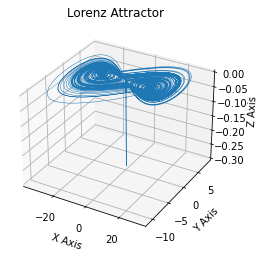

In [13]:
# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(delayssvd[0], delayssvd[1], delayssvd[2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize

In [11]:
data = pd.DataFrame([xs, ys, zs]).transpose()
data = data.to_numpy()
data.shape
data

array([[ 0.        ,  1.        ,  1.05      ],
       [ 0.1       ,  0.99      ,  1.0219965 ],
       [ 0.189     ,  1.007078  ,  0.99572985],
       ...,
       [ 8.77456852, 13.39169112, 19.84783236],
       [ 9.23628078, 13.97309174, 20.49355378],
       [ 9.70996188, 14.52667728, 21.23758469]])

In [224]:
x, y, z = data[10000]
x, y, z

(9.709961879594102, 14.526677276746598, 21.237584691842496)

In [8]:
from scipy.spatial import distance, cKDTree

In [18]:
kdtree = cKDTree(data[:10000], leafsize=100)
distances = np.array([0, 3, 3])
indexes = np.array([0, 3, 3])
for item in data:
    dists, idxs = kdtree.query(item, k=4, distance_upper_bound=6)
    dists = dists[1:]
    idxs = idxs[1:]
    distances = np.vstack([distances, dists])
    indexes = np.vstack([indexes, idxs])

distances = distances[1:]
indexes = indexes[1:]

distances, indexes

(array([[0.10432735, 0.1967647 , 0.2861364 ],
        [0.09435356, 0.10432735, 0.18744958],
        [0.09435356, 0.09475544, 0.19615576],
        ...,
        [0.34412435, 0.42241696, 0.65837201],
        [0.36522176, 0.42579611, 0.64762275],
        [0.4338535 , 0.63665403, 0.73689504]]),
 array([[   1,    2,    3],
        [   2,    0,    3],
        [   1,    3,    4],
        ...,
        [4340, 3242, 6368],
        [4341, 3243, 6369],
        [3244, 6370, 4343]], dtype=int64))

In [295]:
d1 = data[2] - data[1]
print(d1)
d2 = data[4] - data[3]
print(d2)
d3 = data[5] - data[4]
print(d3)
d = (d1+d2+d3)/3
print(d)

print(data[2] + d - data[3])

[ 0.089       0.017078   -0.02626665]
[ 0.07772375  0.06271598 -0.02306044]
[ 0.07622297  0.08317708 -0.02141225]
[ 0.08098224  0.05432369 -0.02357978]
[-0.00082556  0.0133564   0.00107296]


In [299]:
indexes[2, 0]
indexes.shape[0]
predictions = [0, 0, 0]

for index in np.arange(indexes.shape[0]):
    i1, i2, i3 = indexes[index, 0], indexes[index, 1], indexes[index, 2]
    d1 = data[i1+1] - data[i1] 
    d2 = data[i2+1] - data[i2]
    d3 = data[i3+1] - data[i3]
    d = (d1+d2+d3)/3
    
    predict = data[index] + d
    predictions = np.vstack([predictions, predict])

predictions = predictions[1:]
predictions

array([[ 0.08284385,  1.04025376,  1.02534006],
       [ 0.18651052,  1.02122776,  0.99675761],
       [ 0.26998224,  1.06140169,  0.97215007],
       ...,
       [ 9.23002931, 13.96378522, 20.48605813],
       [ 9.7034049 , 14.51713884, 21.22837111],
       [10.18625862, 15.01133221, 22.10300481]])

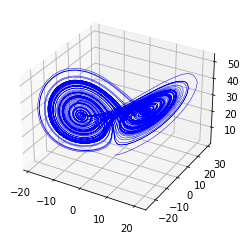

In [301]:
ax = plt.figure().add_subplot(projection='3d')
# ax.plot(data[:, 0], data[:, 1], data[:, 2], lw=.5, color='red')
ax.plot(predictions[:, 0], predictions[:, 1], predictions[:, 2], lw=.5, color='blue')
plt.show()

In [302]:
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

rmse(predictions, data)

0.6122722568035484

0.0007872263137525474

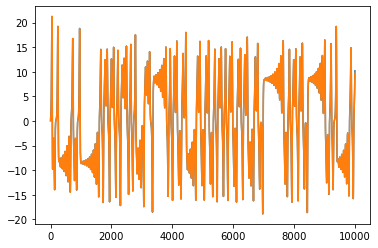

In [306]:
plt.plot(predictions[:,0])
plt.plot(data[:, 0])

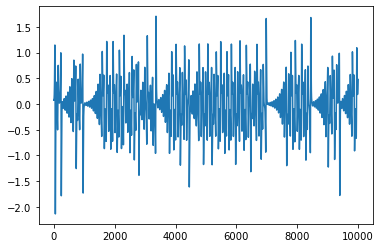

In [308]:
plt.plot(predictions[:, 0] - data[:, 0])

In [17]:
from tqdm.auto import tqdm

In [31]:
test_data = data[:5000].copy()

for t in tqdm(range(0, 5000)):
    kdtree = cKDTree(test_data[:4999 + t], leafsize=100)
    distances = np.array([0, 3, 3])
    indexes = np.array([0, 3, 3])
    for item in test_data:
        dists, idxs = kdtree.query(item, k=4, distance_upper_bound=6)
        dists = dists[1:]
        idxs = idxs[1:]
        distances = np.vstack([distances, dists])
        indexes = np.vstack([indexes, idxs])

    distances = distances[1:]
    indexes = indexes[1:]
    
    predictions = [0, 0, 0]

    index = 4999+t
    i1, i2, i3 = indexes[index, 0], indexes[index, 1], indexes[index, 2]
    d1 = test_data[i1+1] - test_data[i1] 
    d2 = test_data[i2+1] - test_data[i2]
    d3 = test_data[i3+1] - test_data[i3]
    d = (d1+d2+d3)/3
    
    predict = test_data[index] + d
    predictions = np.vstack([predictions, predict])

    predictions = predictions[1:]
    
    test_data = np.vstack([test_data, predictions])


  0%|          | 0/5000 [00:00<?, ?it/s]

KeyboardInterrupt: 

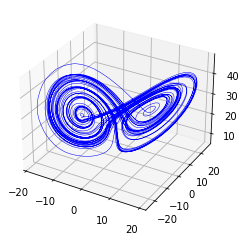

In [361]:
ax = plt.figure().add_subplot(projection='3d')
# ax.plot(data[:, 0], data[:, 1], data[:, 2], lw=.5, color='red')
ax.plot(test_data[5000:, 0], test_data[5000:, 1], test_data[5000:, 2], lw=.5, color='blue')
plt.show()

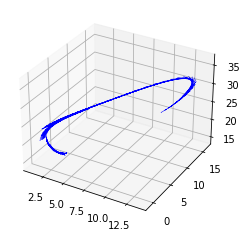

In [324]:
ax = plt.figure().add_subplot(projection='3d')
# ax.plot(data[:, 0], data[:, 1], data[:, 2], lw=.5, color='red')
ax.plot(test_data[10000:, 0], test_data[10000:, 1], test_data[10000:, 2], lw=.5, color='blue')
plt.show()

In [ ]:
rmse(test_data, data[:10000])

In [9]:
from scipy.spatial import cKDTree

In [23]:
data_2 = pd.DataFrame([xs, x10, x20]).transpose()
data_2 = data_2.to_numpy()
test_data = data_2[:8000].copy()

In [24]:
for t in tqdm(range(0, 200)):
    kdtree = cKDTree(test_data[:7999 + t], leafsize=100)
    distances = np.array([0, 3, 3])
    indexes = np.array([0, 3, 3])
    for item in test_data:
        dists, idxs = kdtree.query(item, k=4, distance_upper_bound=6)
        dists = dists[1:]
        idxs = idxs[1:]
        distances = np.vstack([distances, dists])
        indexes = np.vstack([indexes, idxs])

    distances = distances[1:]
    indexes = indexes[1:]
    
    predictions = [0, 0, 0]

    index = 7999+t
    i1, i2, i3 = indexes[index, 0], indexes[index, 1], indexes[index, 2]
    d1 = test_data[i1+1] - test_data[i1] 
    d2 = test_data[i2+1] - test_data[i2]
    d3 = test_data[i3+1] - test_data[i3]
    d = (d1+d2+d3)/3
    
    predict = test_data[index] + d
    predictions = np.vstack([predictions, predict])

    predictions = predictions[1:]
    
    test_data = np.vstack([test_data, predictions])

  0%|          | 0/200 [00:00<?, ?it/s]

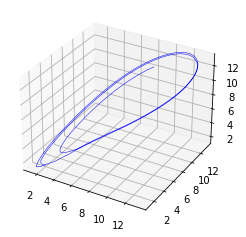

In [26]:
ax = plt.figure().add_subplot(projection='3d')
# ax.plot(data[:, 0], data[:, 1], data[:, 2], lw=.5, color='red')
ax.plot(test_data[8000:, 0], test_data[8000:, 1], test_data[8000:, 2], lw=.5, color='blue')
plt.show()

Text(0.5, 1.0, 'X error')

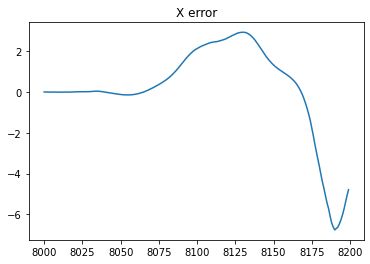

In [27]:
# plt.plot(range(8000, 8200), data_2[8000:8200, 0])
plt.plot(range(8000, 8200), (test_data[8000:8200, 0] - data_2[8000:8200, 0]) / test_data[8000:8200, 0])
plt.title("X error")

Text(0.5, 1.0, 'Y error')

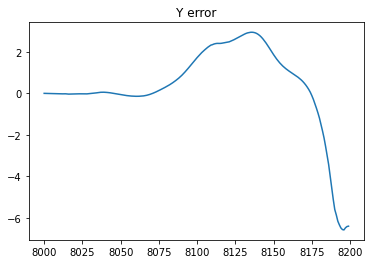

In [28]:
plt.plot(range(8000, 8200), (test_data[8000:8200, 1] - data_2[8000:8200, 1]) / test_data[8000:8200, 1])
plt.title("Y error")

Text(0.5, 1.0, 'Z error')

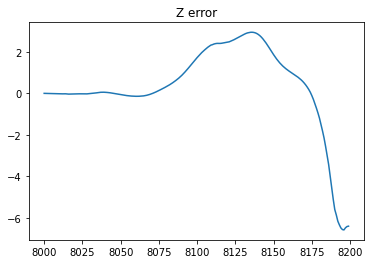

In [29]:
plt.plot(range(8000, 8200), (test_data[8000:8200, 2] - data_2[8000:8200, 2]) / test_data[8000:8200, 2])
plt.title("Z error")

In [30]:
test_data = delayssvd.transpose()[:8000].copy()

In [10]:
delayssvd.transpose()

array([[-1.28190582e-311, -8.91970421e-312, -1.03541822e-316],
       [-5.71155036e-002,  8.20842204e-002,  1.00663046e-006],
       [-1.07948302e-001,  1.55139177e-001,  1.90253157e-006],
       ...,
       [-1.24122528e+001,  2.05307162e+000,  2.85514001e-005],
       [-1.30830475e+001,  2.14880801e+000,  2.99110344e-005],
       [-1.37840976e+001,  2.23807338e+000,  3.12019886e-005]])

In [31]:
for t in tqdm(range(0, 200)):
    kdtree = cKDTree(test_data[:7999 + t], leafsize=100)
    distances = np.array([0, 3, 3])
    indexes = np.array([0, 3, 3])
    for item in test_data:
        dists, idxs = kdtree.query(item, k=4, distance_upper_bound=6)
        dists = dists[1:]
        idxs = idxs[1:]
        distances = np.vstack([distances, dists])
        indexes = np.vstack([indexes, idxs])

    distances = distances[1:]
    indexes = indexes[1:]
    
    predictions = [0, 0, 0]

    index = 7999+t
    i1, i2, i3 = indexes[index, 0], indexes[index, 1], indexes[index, 2]
    d1 = test_data[i1+1] - test_data[i1] 
    d2 = test_data[i2+1] - test_data[i2]
    d3 = test_data[i3+1] - test_data[i3]
    d = (d1+d2+d3)/3
    
    predict = test_data[index] + d
    predictions = np.vstack([predictions, predict])

    predictions = predictions[1:]
    
    test_data = np.vstack([test_data, predictions])

  0%|          | 0/200 [00:00<?, ?it/s]

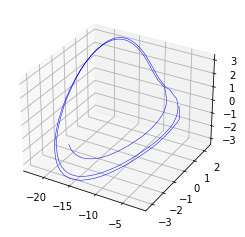

In [32]:
ax = plt.figure().add_subplot(projection='3d')
# ax.plot(data[:, 0], data[:, 1], data[:, 2], lw=.5, color='red')
ax.plot(test_data[8000:, 0], test_data[8000:, 1], test_data[8000:, 2], lw=.5, color='blue')
plt.show()

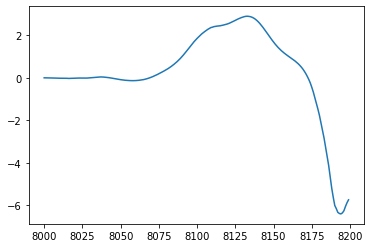

In [33]:
plt.plot(range(8000, 8200), (test_data[8000:8200, 0] - delayssvd.transpose()[8000:8200, 0]) / test_data[8000:8200, 0])

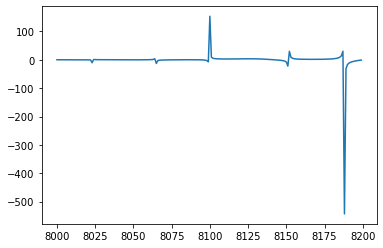

In [34]:
plt.plot(range(8000, 8200), (test_data[8000:8200, 1] - delayssvd.transpose()[8000:8200, 1]) / test_data[8000:8200, 1])

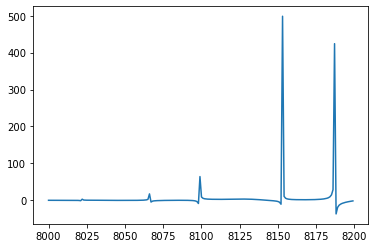

In [35]:
plt.plot(range(8000, 8200), (test_data[8000:8200, 2] - delayssvd.transpose()[8000:8200, 2]) / test_data[8000:8200, 2])

In [ ]:
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)

In [27]:
yhat

array([[10.19163342, 14.71174579, 21.27890712]])

In [13]:
random = np.random.rand(10001, 3)
random.shape

(10001, 3)

In [14]:
kdtree = cKDTree(random[:10000], leafsize=100)
distances = np.array([0, 3, 3])
indexes = np.array([0, 3, 3])
for item in data:
    dists, idxs = kdtree.query(item, k=4, distance_upper_bound=6)
    dists = dists[1:]
    idxs = idxs[1:]
    distances = np.vstack([distances, dists])
    indexes = np.vstack([indexes, idxs])

distances = distances[1:]
indexes = indexes[1:]

In [22]:
random_pred = random[:8000].copy()

In [23]:
for t in tqdm(range(0, 200)):
    kdtree = cKDTree(random[:7999 + t], leafsize=100)
    distances = np.array([0, 3, 3])
    indexes = np.array([0, 3, 3])
    for item in random:
        dists, idxs = kdtree.query(item, k=4, distance_upper_bound=6)
        dists = dists[1:]
        idxs = idxs[1:]
        distances = np.vstack([distances, dists])
        indexes = np.vstack([indexes, idxs])

    distances = distances[1:]
    indexes = indexes[1:]
    
    predictions = [0, 0, 0]

    index = 7999+t
    i1, i2, i3 = indexes[index, 0], indexes[index, 1], indexes[index, 2]
    d1 = random_pred[i1+1] - random_pred[i1] 
    d2 = random_pred[i2+1] - random_pred[i2]
    d3 = random_pred[i3+1] - random_pred[i3]
    d = (d1+d2+d3)/3
    
    predict = random_pred[index] + d
    predictions = np.vstack([predictions, predict])

    predictions = predictions[1:]
    
    random_pred = np.vstack([random_pred, predictions])

  0%|          | 0/200 [00:00<?, ?it/s]

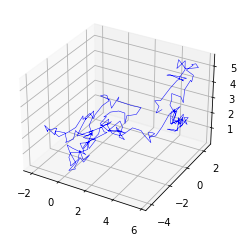

In [24]:
ax = plt.figure().add_subplot(projection='3d')
# ax.plot(data[:, 0], data[:, 1], data[:, 2], lw=.5, color='red')
ax.plot(random_pred[8000:, 0], random_pred[8000:, 1], random_pred[8000:, 2], lw=.5, color='blue')
plt.show()